In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, diff, optimize

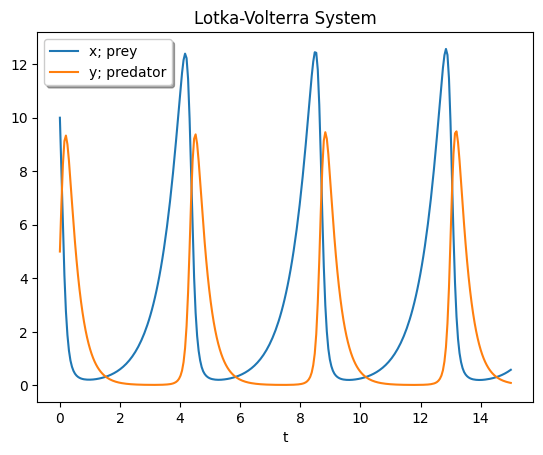

In [2]:
from scipy.integrate import solve_ivp

def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]

sol = solve_ivp(lotkavolterra, [0, 15], [10, 5], args=(1.5, 1,   3, 1),dense_output=True)

t = np.linspace(0, 15, 300)
z = sol.sol(t)

plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x; prey', 'y; predator'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()

In [3]:
x2 = lambda x: x**2
ans = integrate.quad(x2, 0, 4)  # numerical result
print(ans)

print(4**3 / 3.)  # analytical result

(21.333333333333332, 2.3684757858670003e-13)
21.333333333333332


In [4]:
from scipy import optimize
def f(x):
    return x**2 -x - 1

sol = optimize.root_scalar(f, bracket=[0, 3]) # numerical result
print(sol.root)

print((1+np.sqrt(5))/2) # analytical result

1.618033988749895
1.618033988749895


In [5]:
def fun(x):
    return [x[0]  + 0.5 * (x[0] - x[1])**3 - 1.0,
    0.5 * (x[1] - x[0])**3 + x[1]]

def jac(x):# Jacbian
    return np.array([[1 + 1.5 * (x[0] - x[1])**2,
                    -1.5 * (x[0] - x[1])**2],
                    [-1.5 * (x[1] - x[0])**2,
                    1 + 1.5 * (x[1] - x[0])**2]])

sol = optimize.root(fun, [0, 0], jac=jac, method='hybr')
print(sol.x)

[0.8411639 0.1588361]


In [6]:
from scipy.optimize import minimize

f = lambda x: (1 - x[0])**2 + 5*(x[1] - x[0]**2)**2
x0 = [-1,-1]
res = minimize(f, x0, method='CG',options={'disp': True})
res.x # solution

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 84
         Gradient evaluations: 28


array([0.9999993 , 0.99999854])

[3.03365304 0.50735616 2.97413376] 1


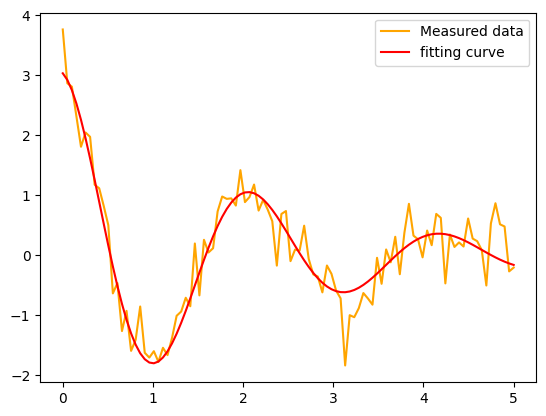

In [7]:
# Solve a nonlinear least-squares problem with bounds on the variables.
import os
import scipy.optimize as opt

fitFunc = lambda p,t: p[0]*np.exp(-p[1]*t)*np.cos(p[2]*t)
errFunc = lambda p,t,u: fitFunc(p,t) - u

x = np.linspace(0,5,100)
y = fitFunc([3,0.5,3],x) + np.random.randn(len(x))/3

p0 = [1,1,1]# Initial values
(p,success) = opt.leastsq(errFunc, p0, args=(x,y))
print(p,success)
nfit = fitFunc(p,x)

plt.plot(x,y,label = 'Measured data', color = 'orange')
plt.plot(x,nfit,label = 'fitting curve', color = 'red')
plt.legend()
plt.show()